In [0]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np

In [0]:
#Connect to the drive folder
from google.colab import drive
drive.mount('/content/gdrive')


In [0]:
#Load datasets
supply = pd.read_csv('gdrive/My Drive/Hourly_DriverActivity.csv')
demand = pd.read_csv('gdrive/My Drive/Hourly_OverviewSearch.csv')

In [0]:
#Summing up the number of people search for a taxi
demand['Customers'] = demand['Taxify: People saw +1 cars (unique)'] + demand['Taxify: People saw 0 cars (unique)']

#Joining demand and supply datasets
#Fill with zero if there are missing data
sd_data = demand.merge(supply, how='outer', on='Date').fillna(0) 

#Changing date format
sd_data = sd_data.assign(Date = sd_data['Date'].apply(lambda x: pd.to_datetime(x)))

#Sort by date
sd_data = sd_data.sort_values(by='Date', ascending=True)

#Constact from date week number
sd_data = sd_data.assign(Week = sd_data['Date'].apply(lambda x: x.week))

#Constact from date hours
sd_data = sd_data.assign(Hour = sd_data['Date'].apply(lambda x: x.hour))

#Constact from date weekdays
sd_data = sd_data.assign(Weekday_num = sd_data['Date'].apply(lambda x: x.weekday()))
sd_data = sd_data.assign(Weekday = sd_data['Date'].apply(lambda x: x.strftime('%A')))

First, I constructed needed features. Then, to answer each question produced additional analysis.

# Q1

This qusetion, I will solve in two following ways.
First, I will compare averaged each 36 hours in a week. We will able to see which 36 hours are more undersupplied in a week.

Second, I will group by hours and see which hours are generally undersupplied. 

In [0]:
#Calculate differences to see undersupplied hours
sd_data['Difference'] = sd_data['Active drivers'] - sd_data.Customers


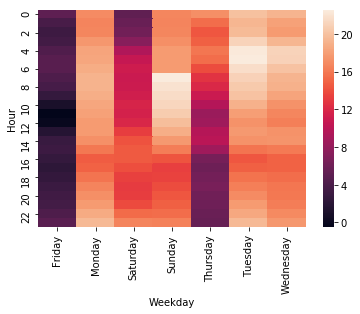

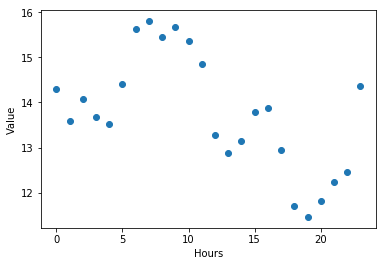

In [0]:
#Copying to the new dataframe
data = sd_data

#Dinding mean value per each 36 hours
data['x'] = data.Difference.rolling(window=36, center=True).mean()

#Groupping by weekday and hour, calculating average
data = data.groupby(['Weekday','Hour']).mean().reset_index().sort_values('Weekday_num')

#Plot 
sns.heatmap(data.pivot( 'Hour', 'Weekday', 'x'))
plt.show()
#Generalize ideas
plt.scatter(data.Hour.unique(), data.groupby('Hour').x.mean())
plt.xlabel('Hours')
plt.ylabel('Value')
plt.show()


As a result, from heatmap we see that, the most undersupplied 36 hours are starting from 18:00 Thursday - 06:00 - Saturday. The most centred undersupplied value is at approximetly 11:00 Friday.

From the scatter plot, we see, the averaged undersupply values per each hours. The results show, 19:00 is the most undersupplied 36 hours center hour.

# Q2

Text(0, 0.5, 'Value')

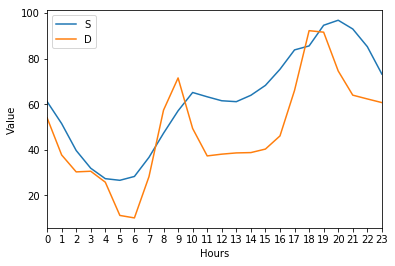

In [0]:
#Extract needed features
data = sd_data[['Customers', 'Active drivers', 'Date']]

#Constact from date hours
data = data.assign(Hour = data['Date'].apply(lambda x: x.hour))

#Group by hour and calculate average values
sd_hours = data.groupby(['Hour']).mean().reset_index()

#Plot averaged number of active drivers
sd_hours['Active drivers'].plot()

#Plot averaged number of customers
sd_hours.Customers.plot()

plt.xticks(np.arange(0, 24, 1))
plt.legend(['S', 'D'])
plt.xlabel('Hours')
plt.ylabel('Value')


The illustrated plot shows number of supply (blue) and demand (orange) per hours. 
Form the graph, we that there are mismatches during 04:00-07:00, 10:00-18:00and 20:00-23:00 as oversupply, and during 07:00-10:00 and 18:00-19:00 as undersupply.

# Q3 

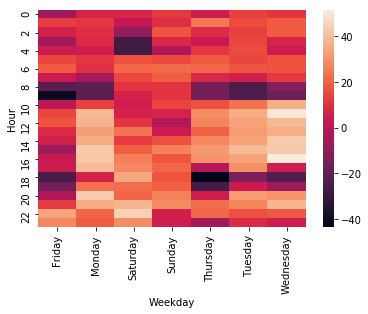

In [0]:

#Extract customers, active drivers, date, hour and weekday
data = sd_data[['Customers', 'Active drivers', 'Date', 'Hour', 'Weekday']]

#Group by weekday and hour, calculate average
sd_weekdays = data.groupby(['Weekday', 'Hour']).mean().reset_index()

#Calculate difference between supply and demand
sd_weekdays = sd_weekdays.assign(Difference= sd_weekdays['Active drivers'] - sd_weekdays['Customers'])[['Weekday', 'Hour', 'Difference']]

#Plotting
sns.heatmap(sd_weekdays.pivot( 'Hour', 'Weekday', 'Difference'))

This heatmap shows lack supply values during a weekly period. 

We can see that Thursday 18:00 and Friday 09:00 are the most undersupplied hours.

# Q4

In [0]:
#Construct date
demand = demand.assign(Date = sd_data['Date'].apply(lambda x: pd.to_datetime(x)))

#Find rows with max coverage ratio, and difference in hours
diff_series = demand[demand['Taxify: Coverage Ratio (unique)']==100].Date.sort_values().diff()

#Print average hours
print(diff_series.mean())

#Print max difference in hours
print(diff_series.max())

0 days 21:14:12.631578
4 days 21:00:00


From the results, we see the averaged number of hours between the highest coverage rate is 21 hours. 

The maximum time we needed to ensure that, there will be the high coverage again is 4 days 21 hours. 